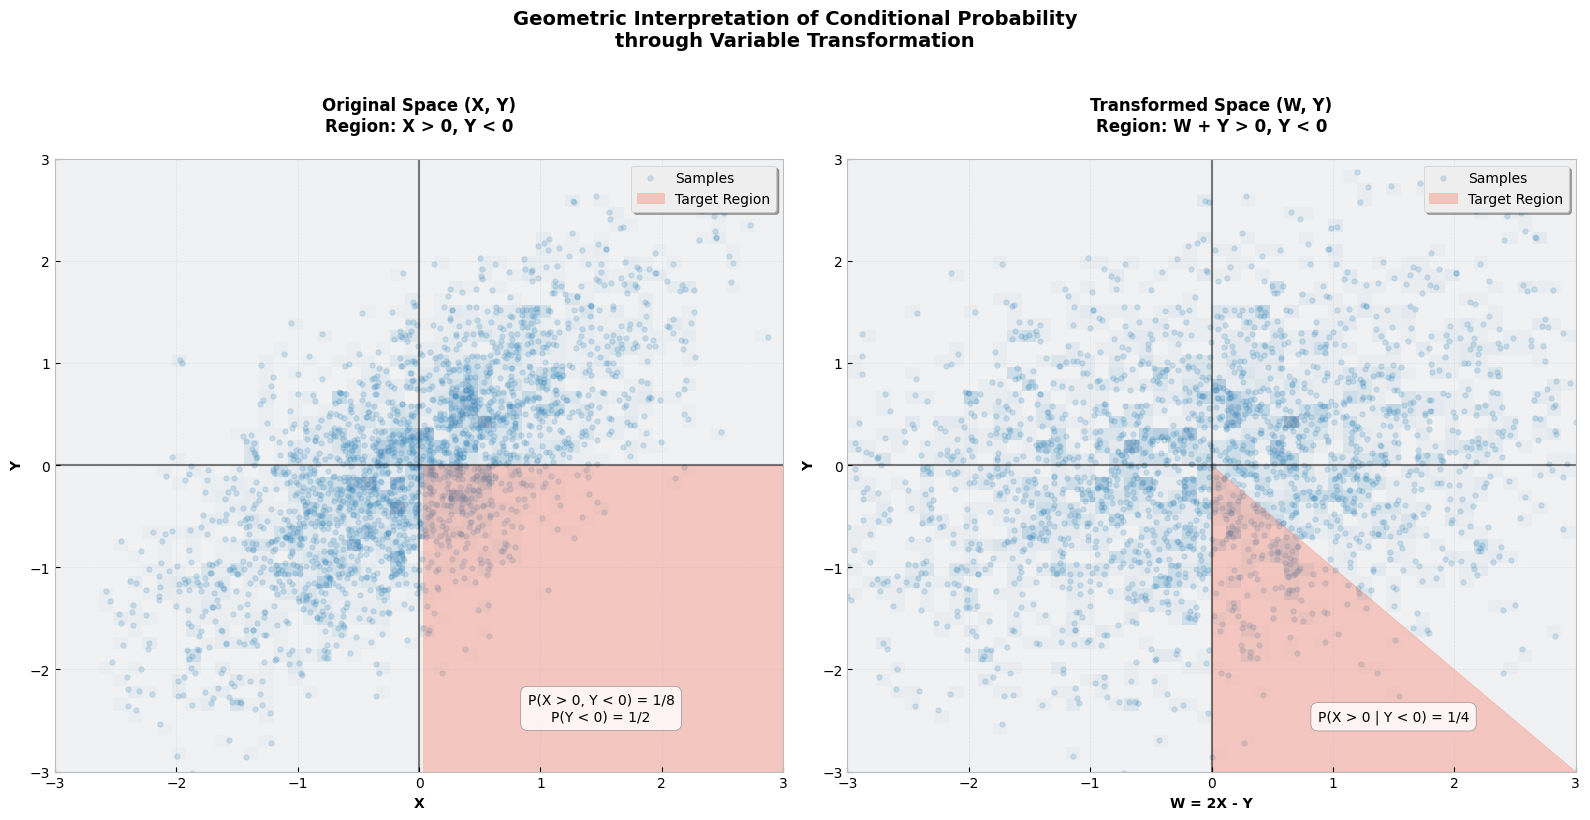

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap

# Set the style of the visualization
plt.style.use('bmh')  # Using a built-in style that gives a modern look

# Set random seed for reproducibility
np.random.seed(42)

# Create figure with two subplots with improved spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Geometric Interpretation of Conditional Probability\nthrough Variable Transformation', 
             fontsize=14, y=1.02, fontweight='bold')

# Parameters for the plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Generate bivariate normal samples with increased sample size
n_samples = 2000
cov_matrix = np.array([[1, 1/np.sqrt(2)], [1/np.sqrt(2), 1]])
samples = np.random.multivariate_normal([0, 0], cov_matrix, n_samples)

# Custom color scheme
sample_color = '#2980b9'  # Dark blue
region_color = '#e74c3c'  # Red
grid_color = '#95a5a6'    # Gray

# First subplot: Original space (X, Y)
ax1.set_title('Original Space (X, Y)\nRegion: X > 0, Y < 0', 
              fontsize=12, pad=20, fontweight='bold')
ax1.set_xlabel('X', fontsize=10, fontweight='bold')
ax1.set_ylabel('Y', fontsize=10, fontweight='bold')

# Create a smooth background using a 2D histogram
counts, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=50,
                                       range=[[-3, 3], [-3, 3]])
extent = [-3, 3, -3, 3]
ax1.imshow(counts.T, extent=extent, origin='lower', cmap='Blues', alpha=0.3,
           aspect='auto')

# Plot the samples with enhanced aesthetics
ax1.scatter(samples[:, 0], samples[:, 1], alpha=0.2, 
            color=sample_color, s=15, label='Samples')

# Highlight the region X > 0, Y < 0 with gradient
region_color_rgba = np.array(plt.cm.Reds(0.5))
region_color_rgba[3] = 0.3  # Set alpha
ax1.fill_between(x[x > 0], 0, -3, color=region_color_rgba, 
                 label='Target Region')

# Add grid and legend with enhanced styling
ax1.grid(True, alpha=0.2, color=grid_color, linestyle='--')
ax1.legend(frameon=True, fancybox=True, shadow=True, loc='upper right')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)

# Add axes with custom styling
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1.5)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.5, linewidth=1.5)

# Second subplot: Transformed space (W, Y)
ax2.set_title('Transformed Space (W, Y)\nRegion: W + Y > 0, Y < 0', 
              fontsize=12, pad=20, fontweight='bold')
ax2.set_xlabel('W = 2X - Y', fontsize=10, fontweight='bold')
ax2.set_ylabel('Y', fontsize=10, fontweight='bold')

# Calculate W for the samples
w_samples = 2 * samples[:, 0] - samples[:, 1]

# Create a smooth background in transformed space
counts_w, xedges, yedges = np.histogram2d(w_samples, samples[:, 1], bins=50,
                                         range=[[-3, 3], [-3, 3]])
ax2.imshow(counts_w.T, extent=extent, origin='lower', cmap='Blues', alpha=0.3,
           aspect='auto')

# Plot the samples in transformed space
ax2.scatter(w_samples, samples[:, 1], alpha=0.2, 
            color=sample_color, s=15, label='Samples')

# Plot the transformed region with enhanced styling
y_plot = np.linspace(-3, 0, 100)
w_plot = -y_plot
ax2.fill_between(w_plot, y_plot, -3, color=region_color_rgba, 
                 label='Target Region')

# Add grid and legend with enhanced styling
ax2.grid(True, alpha=0.2, color=grid_color, linestyle='--')
ax2.legend(frameon=True, fancybox=True, shadow=True, loc='upper right')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

# Add axes with custom styling
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1.5)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.5, linewidth=1.5)

# Add text annotations explaining the probability with enhanced box style
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, 
            edgecolor='gray')
ax1.text(1.5, -2.5, 'P(X > 0, Y < 0) = 1/8\nP(Y < 0) = 1/2', 
         fontsize=10, bbox=props, ha='center')
ax2.text(1.5, -2.5, 'P(X > 0 | Y < 0) = 1/4', 
         fontsize=10, bbox=props, ha='center')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()